Implementation of Ridge Regression from scratch

0.6274208425210384
0.7122688287762831


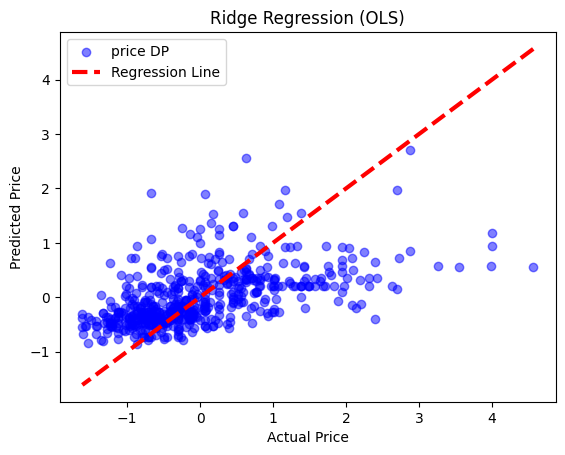

In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error
import matplotlib.pyplot as plt

# Ridge regression is designed for multiple features (independent variables).
csv=pd.read_csv('Housing.csv')
# print(csv.head())

x_preNormalized= np.array(csv[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']])
y_PreNormalized= np.array(csv['price'])

# z score normalizing 
x=(x_preNormalized-np.mean(x_preNormalized))/np.std(x_preNormalized)
y=(y_PreNormalized-np.mean(y_PreNormalized))/np.std(y_PreNormalized)

# scratch implementation
# xTx
x_transpose=np.transpose(x)
x_transpose_x=np.dot(x_transpose,x)

# regularization parameter L(lambda)
# L should be between 0 and 1
L=0.7

# xtx shape (pxp): shape of I 
xTx_shape=np.shape(x_transpose_x)

# I: identity matrix
I=np.identity(xTx_shape[0])

# lambda(L).identity matrix (I)
LI=np.dot(L,I)

# (xTx+LI)^-1
# let parameter_1=(xTx+LI)^-1
parameter_1=np.linalg.inv((x_transpose_x+LI))

# parameter_2: xTy
parameter_2=np.dot(x_transpose,y)

# beta cofficient
beta_cofficient=np.dot(parameter_1,parameter_2)

# using this B cofficient to predict prices
y_predicted=np.dot(x,beta_cofficient)

# model evaluation
MAE=mean_absolute_error(y,y_predicted)
MSE=mean_squared_error(y,y_predicted)
print(MAE)
print(MSE)

# ridge produce small amount of MAE and MSE, reason lies in it's work function
# ridge adds L2 penalty on the cofficients, that shrinks the cofficients when features are noisy
# by shrinking ridge reduces the variance at the cost of little bias.

# Ridge sacrifices a tiny bit of fit (bias ↑) 
# but gains a big reduction in variance → predictions on unseen/test data are better.

plt.scatter(y,y_predicted,color='blue',alpha=0.5,label='price DP')
plt.plot(y,y,'r--',lw=3,label='Regression Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Ridge Regression (OLS)')
plt.legend()
plt.show()

